In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve

np.random.seed(42)

In [286]:
df = pd.read_csv('C:/Users/user/Downloads/famcs_students.csv')

print(df.head())
df.info()

   cource  group                  stream sex   age   ss          interest  \
0       4     11  Прикладная информатика   М  20.0  Нет        Математика   
1       4     11  Прикладная информатика   Ж  20.0  Нет  Программирование   
2       4     11  Прикладная информатика   Ж  19.0  Нет  Программирование   
3       4     11  Прикладная информатика   Ж  20.0  Нет        Математика   
4       4     11  Прикладная информатика   М  20.0  Нет        Математика   

        os weekend_study bad_sleep  ...      social  \
0    MacOS            Да        Да  ...  Экстраверт   
1    MacOS           Нет       Нет  ...  Экстраверт   
2    MacOS            Да       Нет  ...  Экстраверт   
3    MacOS            Да        Да  ...  Экстраверт   
4  Windows            Да       Нет  ...   Интроверт   

                       sport  miss  study_form foot_size eye_color score  \
0  Редко, легкая физкультура   3.0      Бюджет      48.0     Карие   9.2   
1            Да, я спортсмен   5.0      Бюджет      39

In [288]:
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']

N = 16
target_col = binary_cols[N % 8]
print(f"Целевая переменная : {target_col}")

feature_cols = ['sex', 'weekend_study', 'work_experience', 'social', 'study_form', 'retake', 'hostel', 'score']
print(f"X: {feature_cols}")

data = df[feature_cols + [target_col]].copy()

Целевая переменная : ss
X: ['sex', 'weekend_study', 'work_experience', 'social', 'study_form', 'retake', 'hostel', 'score']


In [290]:
binary_map = {
    'М': 0, 'Ж': 1,
    'Да': 1, 'Нет': 0,
    'Платная': 1, 'Бюджет': 0
}

binary_cols_in_X = ['sex', 'weekend_study', 'study_form'] 
for col in binary_cols_in_X:
    data[col] = data[col].map(binary_map)

if data[target_col].dtype == 'object':
    data[target_col] = data[target_col].map(binary_map)

# work_experience
work_map = {
    'Не работаю': 0,
    'Меньше года': 1,
    '1-2 года': 2,
    'более 2 лет': 3
}
data['work_experience'] = data['work_experience'].map(work_map)

# retake
data['retake'] = data['retake'].replace('2+', 2).astype(int)

# One-Hot Encoding
nominal_cols = ['social', 'hostel']
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True) # если не первые два варианта то и так третий

X = data.drop(target_col, axis=1) 
y = data[target_col]

print(X.info())
print(X.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        127 non-null    int64  
 1   weekend_study              127 non-null    int64  
 2   work_experience            127 non-null    int64  
 3   study_form                 127 non-null    int64  
 4   retake                     127 non-null    int32  
 5   score                      127 non-null    float64
 6   social_Социофоб            127 non-null    bool   
 7   social_Экстраверт          127 non-null    bool   
 8   hostel_Нет, я из Минска    127 non-null    bool   
 9   hostel_Нет, я из регионов  127 non-null    bool   
dtypes: bool(4), float64(1), int32(1), int64(4)
memory usage: 6.1 KB
None
   sex  weekend_study  work_experience  study_form  retake  score  \
0    0              1                1           0       0    9.2   
1    1     

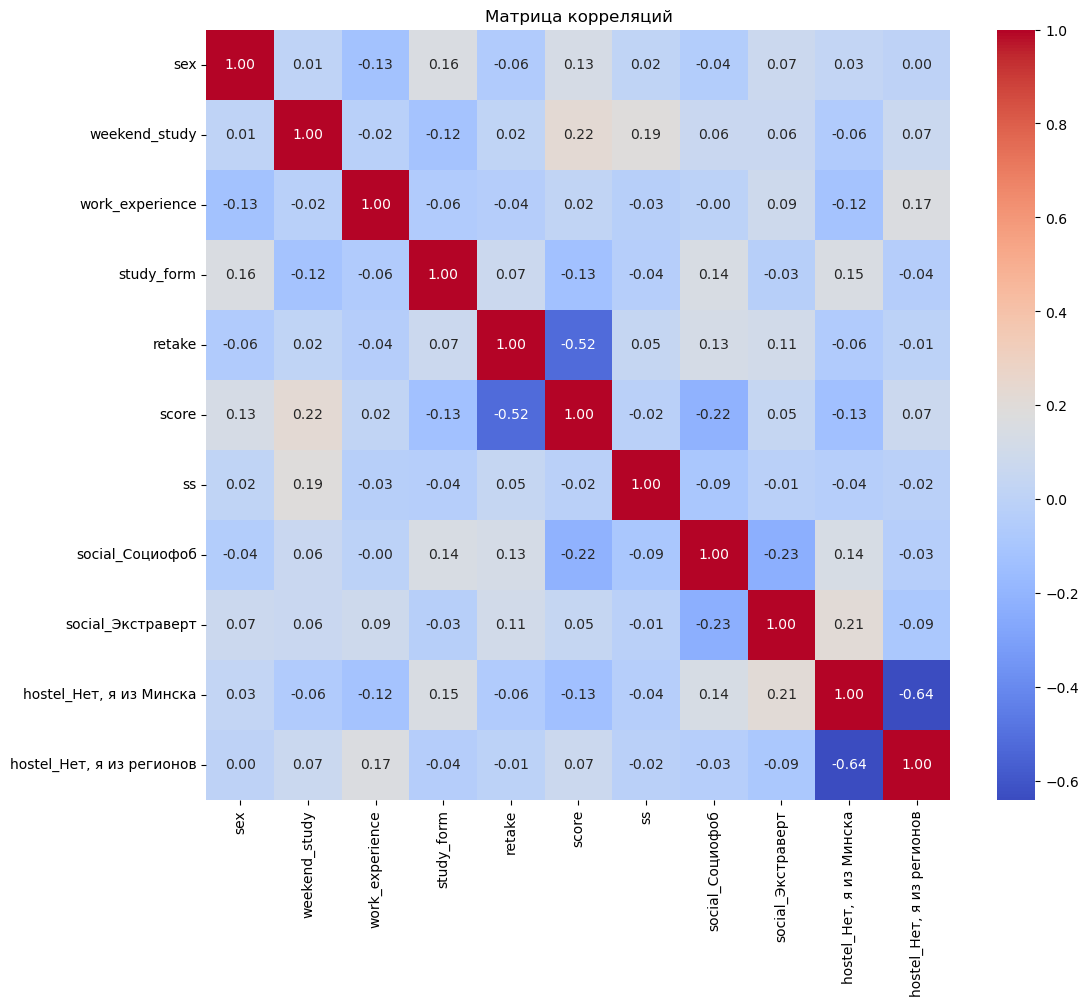

In [292]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

In [293]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Размер тренировочной выборки: {X_train.shape[0]}")
print(f"Размер валидационной выборки: {X_val.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

scaler = StandardScaler() # чтобы данные имели ср. зн. 0 и стандартное отклонение 1.
numerical_cols = ['score', 'weekend_study', 'work_experience', 'study_form', 'retake']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(X_train.head())

Размер тренировочной выборки: 88
Размер валидационной выборки: 19
Размер тестовой выборки: 20
    sex  weekend_study  work_experience  study_form    retake     score  \
59    0       0.559851        -1.195525   -0.629941 -0.317262  0.238692   
0     0       0.559851        -0.099627   -0.629941 -0.317262  1.013781   
39    0       0.559851        -0.099627   -0.629941 -0.317262 -0.665578   
31    0       0.559851        -0.099627    1.587451 -0.317262 -0.536397   
89    0      -1.786190        -1.195525   -0.629941 -0.317262  0.238692   

    social_Социофоб  social_Экстраверт  hostel_Нет, я из Минска  \
59            False               True                     True   
0             False               True                     True   
39            False              False                    False   
31            False               True                     True   
89            False              False                    False   

    hostel_Нет, я из регионов  
59                  

In [296]:
class TrivialClassifier:
    def fit(self, y_train):
        self.most_frequent_class = y_train.mode()[0]
        print(f"Самый частый класс {self.most_frequent_class}")

    def predict(self, X):
        return np.full(X.shape[0], self.most_frequent_class)

trivial_clf = TrivialClassifier()
trivial_clf.fit(y_train)

Самый частый класс 0


In [298]:
class MyNaiveBayes:
    def fit(self, X, y):
        X = np.array(X, dtype=float)
        
        n_samples, n_features = X.shape # кол-во студентов, кол-во признаков
        self._classes = np.unique(y) # уникальные классы в целевой переменной
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            # выбираем только тех студентов из X, которые принадлежат текущему классу целевой переменной
            X_c = X[y == c]
            # среднее для КАЖДОГО признака внутри этого класса
            self._mean[idx, :] = X_c.mean(axis=0)
            # дисперсия для КАЖДОГО признака внутри этого класса
            self._var[idx, :] = X_c.var(axis=0)
            # доля людей в классе
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    # P(x_i | y) - Насколько вероятно встретить такое значение признака x, если объект принадлежит классу class_idx
    def _pdf(self, class_idx, x):
        # среднее и дисперсию для опред класса
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x - mean)**2 / (2 * var + 1e-9))
        denominator = np.sqrt(2 * np.pi * var + 1e-9)
        return numerator / denominator

    # y_pred=argmax_y(log(P(y))+∑(i=1...n)log(P(x_i|y)))
    def _predict_log_proba(self, X):
        X = np.array(X, dtype=float)

        log_probas = np.zeros((X.shape[0], len(self._classes)))
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            # Используем сумму логарифмов вместо произведения вероятностей
            likelihood = np.sum(np.log(self._pdf(idx, X) + 1e-9), axis=1)
            log_probas[:, idx] = prior + likelihood
        return log_probas

    def predict(self, X):
        log_probas = self._predict_log_proba(X)
        return self._classes[np.argmax(log_probas, axis=1)] # в чём уверен больше

nb_clf = MyNaiveBayes()
nb_clf.fit(X_train.values, y_train.values)

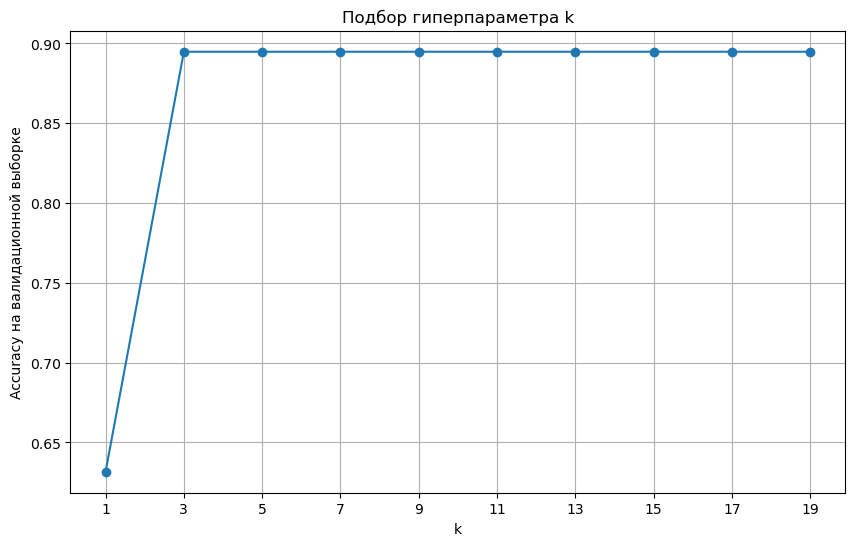


Оптимальное значение k: 3


In [300]:
from collections import Counter

class MyKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        # евклидово расстояни
        return np.sqrt(np.sum((x1 - x2)**2))

    def _predict_single(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        y_pred = [self._predict_single(x) for x in X]
        return np.array(y_pred)


k_values = range(1, 20, 2)
accuracies = []

for k in k_values:
    knn_clf = MyKNN(k=k)
    knn_clf.fit(X_train.values, y_train.values)
    y_val_pred = knn_clf.predict(X_val.values)
    accuracies.append(accuracy_score(y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Подбор гиперпараметра k')
plt.xlabel('k')
plt.ylabel('Accuracy на валидационной выборке')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"\nОптимальное значение k: {best_k}")

# Обучаем с лучшим k
knn_clf_best = MyKNN(k=best_k)
knn_clf_best.fit(X_train.values, y_train.values)

In [301]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iters = n_iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, class_weight=None):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        
        n_samples, n_features = X.shape # количество строк, столбцов
        # начинаем с нулевых весов и смещения
        self.weights = np.zeros(n_features)
        self.bias = 0
        sample_weights = np.ones(n_samples) # По умолчанию все веса равны 1
        if class_weight:
            for i, label in enumerate(y):
                sample_weights[i] = class_weight.get(label, 1)
                
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias #  X·w
            y_predicted = self._sigmoid(linear_model) # преобразование с сигмоиду для значений отт 0 до 1

            error = y_predicted - y
            weighted_error = error * sample_weights
            
            dw = (1 / n_samples) * np.dot(X.T, weighted_error)
            db = (1 / n_samples) * np.sum(weighted_error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        X = np.array(X, dtype=float)
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        y_predicted_probs = self.predict_proba(X)
        y_predicted_labels = [1 if i > threshold else 0 for i in y_predicted_probs]
        return np.array(y_predicted_labels)

log_reg = MyLogisticRegression(learning_rate=0.1, n_iterations=1000)

weights = {0: 1, 1: 1} 
log_reg.fit(X_train.values, y_train.values, class_weight=weights)


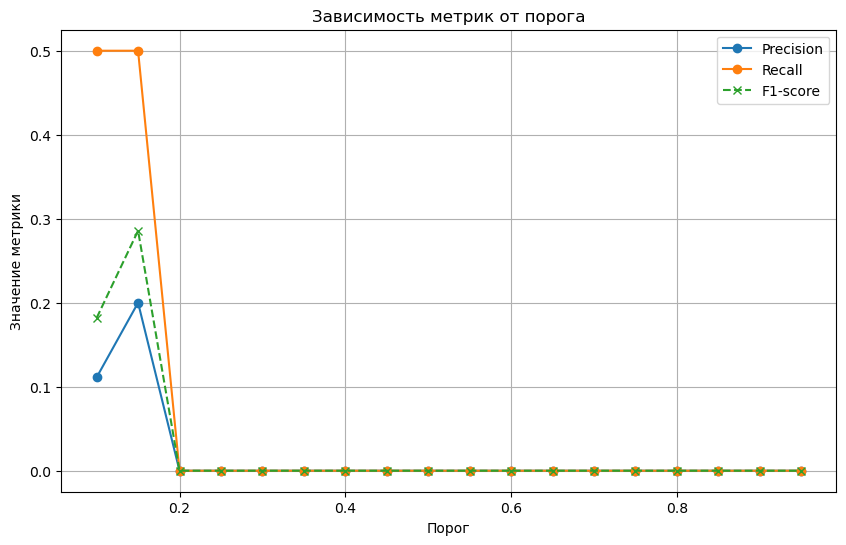


Оптимальный порог классификации: 0.15 с F1-мерой: 0.2857


In [303]:
from sklearn.metrics import f1_score

precisions = [] # TP / (TP + FP)
recalls = [] # TP / (TP + FN)
f1_scores = [] # 2 * (Precision * Recall) / (Precision + Recall)
thresholds = np.arange(0.1, 1.0, 0.05)

# предсказанные вероятности
y_val_proba = log_reg.predict_proba(X_val.values)

for thresh in thresholds:
    y_pred_thresh = (y_val_proba >= thresh).astype(int)
    f1 = f1_score(y_val, y_pred_thresh)
    prec = precision_score(y_val, y_pred_thresh, zero_division=0)
    rec = recall_score(y_val, y_pred_thresh, zero_division=0)
    
    f1_scores.append(f1)
    precisions.append(prec)
    recalls.append(rec)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, f1_scores, label='F1-score', marker='x', linestyle='--')
plt.title('Зависимость метрик от порога')
plt.xlabel('Порог')
plt.ylabel('Значение метрики')
plt.legend()
plt.grid(True)
plt.show()

# лучший порог
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]
print(f"\nОптимальный порог классификации: {best_threshold:.2f} с F1-мерой: {f1_scores[best_threshold_idx]:.4f}")

--- Оценка качества для модели: Тривиальный классификатор ---
Accuracy: 0.9000
Precision: 0.0000
Recall: 0.0000


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


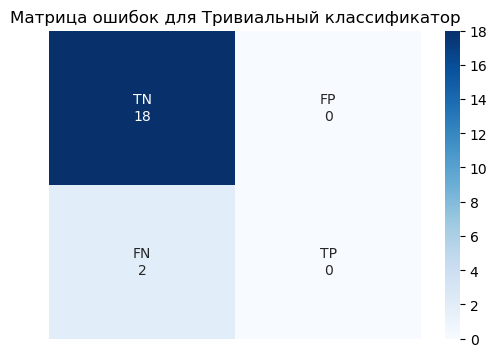

--- Оценка качества для модели: Наивный Байес ---
Accuracy: 0.2500
Precision: 0.1176
Recall: 1.0000


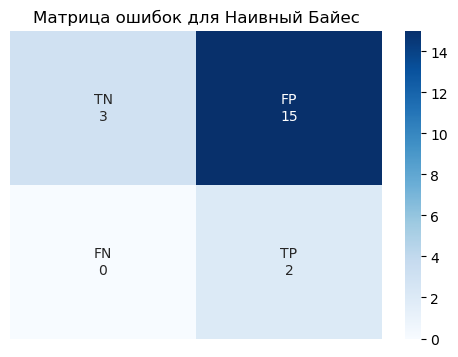

--- Оценка качества для модели: k-NN (k=3) ---
Accuracy: 0.9000
Precision: 0.0000
Recall: 0.0000


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


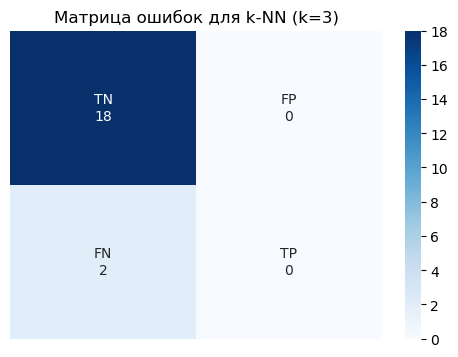

--- Оценка качества для модели: Логистическая регрессии ---
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
ROC-AUC: 0.2778


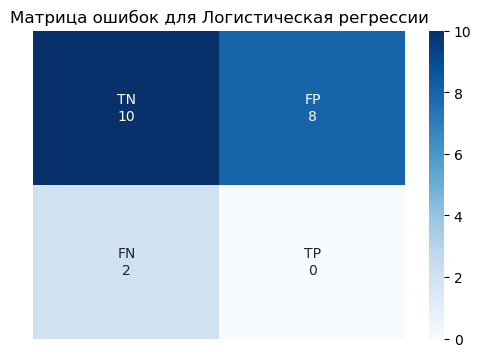

In [306]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name, roc_need=False):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"--- Оценка качества для модели: {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}") # Accuracy = (TP + TN) / (TP + TN + FP + FN)
    print(f"Precision: {precision:.4f}") # Precision = TP / (TP + FP)
    print(f"Recall: {recall:.4f}") # Recall = TP / (TP + FN)
    if roc_need :
        print(f"ROC-AUC: {roc_auc_score(y_true, y_pred_proba):.4f}") # площадь под кривой (зависимость Recall от FP / (FP + TN) при сдвиге порога)

    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    labels = np.array([
        [f'TN\n{tn}', f'FP\n{fp}'],
        [f'FN\n{fn}', f'TP\n{tp}']
    ])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=False,
            yticklabels=False)
    plt.title(f'Матрица ошибок для {model_name}')
    plt.show()
    
# Тривиальный классификатор
y_pred_trivial = trivial_clf.predict(X_test)
evaluate_model(y_test, y_pred_trivial, 0, "Тривиальный классификатор")

# Наивный байесовский классификатор
y_pred_nb = nb_clf.predict(X_test.values)
evaluate_model(y_test, y_pred_nb, 0, "Наивный Байес")

# k-NN
y_pred_knn = knn_clf_best.predict(X_test.values)
evaluate_model(y_test, y_pred_knn, 0, f"k-NN (k={best_k})")

# Логистическая регрессия
y_proba_log_reg = log_reg.predict_proba(X_test.values)
y_pred_log_reg = log_reg.predict(X_test.values, threshold=best_threshold)
evaluate_model(y_test, y_pred_log_reg, y_proba_log_reg, f"Логистическая регрессии", True)
